<h1> <a href=http://www.datascience-paris-saclay.fr/>Paris Saclay Center for Data Science</a> </h1>

<h2> Titanic RAMP: survival prediction of Titanic passengers </h2>

<i> Benoit Playe (Institut Curie/Mines ParisTech), Chloé-Agathe Azencott (Institut Curie/Mines ParisTech), Alex Gramfort (LTCI/Télécom ParisTech), Balázs Kégl (LAL/CNRS)</i>

<h2> Introduction </h2>
This project is an initiation project to introduce RAMP and make you comfortable with its functioning.

The goal is to develop prediction models able to <b> identify people who survived from the Titanic shinking based on gender, age and ticket's information</b>.  

The data we'll manipulate is from the <a href=https://www.kaggle.com/c/titanic-gettingStarted>Titanic kaggle challenge</a>.

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   
* seaborn>=0.7.1

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis

### Loading the data

In [2]:
train_filename = 'data/public/public_train.csv'
data = pd.read_csv(train_filename)
y_df = data['Survived']
X_df = data.drop(['Survived', 'PassengerId'], axis=1)
X_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
1,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
2,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
3,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
4,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,445.000000,445.00000,445.000000,356.000000,445.000000,445.000000,445.000000
mean,446.274157,0.38427,2.312360,28.761236,0.559551,0.404494,33.503707
std,259.362344,0.48697,0.832317,14.225454,1.169885,0.792975,53.120685
min,2.000000,0.00000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,220.000000,0.00000,2.000000,19.000000,0.000000,0.000000,7.925000
50%,439.000000,0.00000,3.000000,28.000000,0.000000,0.000000,15.245800
75%,670.000000,1.00000,3.000000,36.000000,1.000000,1.000000,31.387500
max,890.000000,1.00000,3.000000,71.000000,8.000000,6.000000,512.329200


In [4]:
data.count()

PassengerId    445
Survived       445
Pclass         445
Name           445
Sex            445
Age            356
SibSp          445
Parch          445
Ticket         445
Fare           445
Cabin          101
Embarked       445
dtype: int64

The data frame has 891 rows. Some passengers have missing information though: in particular Age and Cabin info can be missing. The meaning of the columns is explained on the challenge website:

https://www.kaggle.com/c/titanic-gettingStarted/data

### Predicting survival

The goal is to predict whether a passenger has survived from others known attribute. Let us group the data according to the `Survived` columns:

In [5]:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,274,274,274,274,216,274,274,274,274,33,274
1,171,171,171,171,140,171,171,171,171,68,171


About two thirds of the passengers perished in the event. A dummy classifier that systematically returns "0" would have an accuracy of 62%, higher than that of a random model.

### Some plots

#### Features densities and co-evolution
A scatterplot matrix allows us to visualize:
* on the diagonal, the density estimation for each of the features
* on each of the off-diagonal plots, a scatterplot between two of the features. Each dot represents a sample.

/Users/alex/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


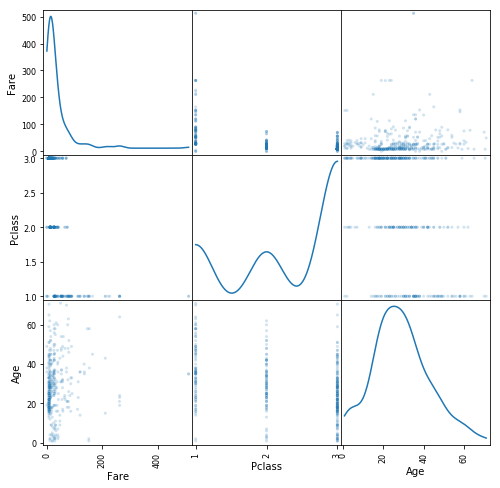

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data.get(['Fare', 'Pclass', 'Age']), alpha=0.2,
               figsize=(8, 8), diagonal='kde');

#### Non-linearly transformed data

The 'Fare' variable has a very heavy tail. We can log-transform it. 

/Users/alex/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


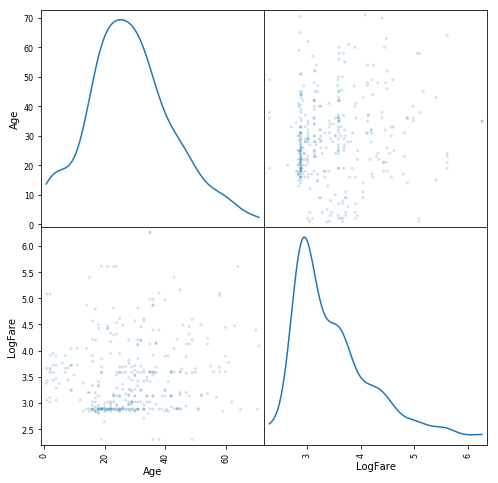

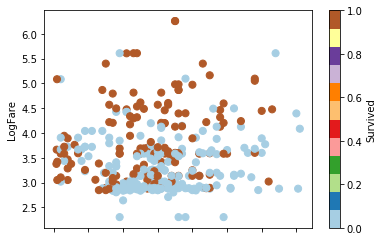

In [7]:
data_plot = data.get(['Age', 'Survived'])
data_plot = data.assign(LogFare=lambda x : np.log(x.Fare + 10.))
scatter_matrix(data_plot.get(['Age', 'LogFare']), alpha=0.2, figsize=(8, 8), diagonal='kde');

data_plot.plot(kind='scatter', x='Age', y='LogFare', c='Survived', s=50, cmap=plt.cm.Paired);

#### Plot of two variables bivariate and univariate distributions

Another way of visualizing relationships between variables is to plot their bivariate distributions.

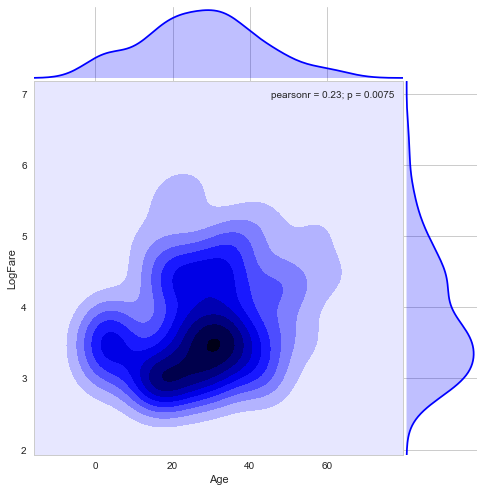

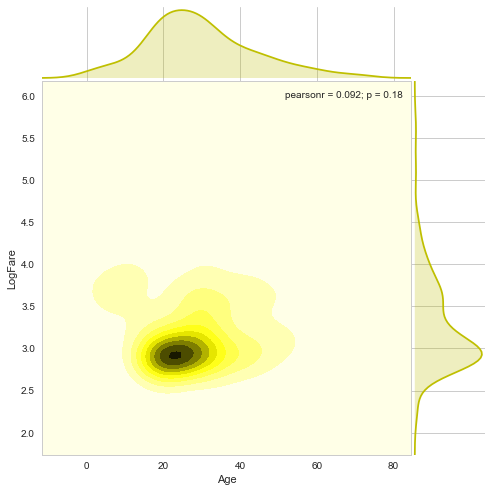

In [8]:
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.jointplot(data_plot.Age[data_plot.Survived == 1],
              data_plot.LogFare[data_plot.Survived == 1],
              kind="kde", size=7, space=0, color="b");

sns.jointplot(data_plot.Age[data_plot.Survived == 0],
              data_plot.LogFare[data_plot.Survived == 0],
              kind="kde", size=7, space=0, color="y");

## Submission

For your submissions, you have to write 2 classes, saved in 2 different files:   
* the class <code>FeatureExtractor</code>, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples, dim of features).  
* a class <code>Classifier</code> to predict the molecule type  

When submitting these files, they are uploaded to our servers and run to give you a score!  

### Feature extractor

The feature extractor for classification is implemented by the function <code>transform</code> and is saved in the file <code>feature_extractor.py</code>. It receives the pandas dataframe <code>X_df</code> defined at the beginning of the notebook. It should produce a numpy array representing the features extracted, which would be used for the classification.  

Below is an example of a feature extractor. You can copy-paste it into your <code>feature_extractor.py</code> file or write a new one!

In [9]:
import numpy as np
import pandas as pd

class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        X_df_new = pd.concat(
            [X_df.get(['Fare', 'Age']),
            pd.get_dummies(X_df.Sex, prefix='Sex', drop_first=True),
            pd.get_dummies(X_df.Pclass, prefix='Pclass', drop_first=True),
            pd.get_dummies(X_df.Embarked, prefix='Embarked', drop_first=True)],
            axis=1)
        X_df_new = X_df_new.fillna(-1)
        XX = X_df_new.values
        return XX

### Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file <code>classifier.py</code>. In its simplest form it takes a scikit-learn pipeline and assignes it to <code>self.clf</code> in <code>__init__</code>.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf =  Pipeline([
            ('imputer', Imputer(strategy='median')),
            ('classifier', LogisticRegression(C=1.))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Place the python files <code>classifier.py</code>, <code>feature_extractor.py</code>, <code>user_test_submission.py</code> in a directory. Det the paths to the data files in <code>user_test_submission.py</code>, and run 

<code>python user_test_submission.py</code>


**If it runs and prints**   
```
Reading file ...
Training file ...
--------------------------
roc auc score = some_number_between_0_and_1
--------------------------
roc auc score = some_number_between_0_and_1
--------------------------
roc auc score = some_number_between_0_and_1
--------------------------
roc auc score = some_number_between_0_and_1
--------------------------
roc auc score = some_number_between_0_and_1
```
**then, you can submit the code.**

To run user_test_submission.py and test your code from the notebook you can do:

In [11]:
!python user_test_submission.py

Reading file ...
Training file ...
--------------------------
roc auc score =  0.816310160428
--------------------------
roc auc score =  0.829144385027
--------------------------
roc auc score =  0.831016042781
--------------------------
roc auc score =  0.817647058824
--------------------------
roc auc score =  0.851871657754
